pages

In [ ]:
annotated_url = "https://gameknot.com/list_annotated.pl?u=all"
number_of_pages = 316

games

In [1]:
import pickle

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
BASE_PATH = '/content/drive/MyDrive/NLP/Data/'

In [4]:
game_urls = pickle.load(open(BASE_PATH+"saved_game_urls.p","rb"))

In [5]:
len(game_urls)

12636

load

In [6]:
games_data_path = BASE_PATH + 'FEN/games_data'
NUMER_OF_DATA_DIRS = 13

In [7]:
paths = [f'{games_data_path}{i+1}.p' for i in range(NUMER_OF_DATA_DIRS)]

In [8]:
data = []
for path in paths:
    with open(path, 'rb') as file:
        raw_data = pickle.load(file)
    data.append(raw_data)

triplets 

In [9]:
lengths = [len(raw_data) for raw_data in data]

In [10]:
sum(lengths)

350027

moves

In [11]:
moves_count = []
for raw_data in data:
  for trio in raw_data:
    moves = trio[1].count(',') + 1
    moves_count.append(moves)

In [12]:
import collections
import matplotlib.pyplot as plt

In [13]:
ctr = collections.Counter(moves_count)

In [ ]:
ctr

(array([205862.,      0.,  60081.,      0.,      0.,  27646.,      0.,
         19487.,      0.,  10139.]),
 array([1. , 1.4, 1.8, 2.2, 2.6, 3. , 3.4, 3.8, 4.2, 4.6, 5. ]),
 <a list of 10 Patch objects>)

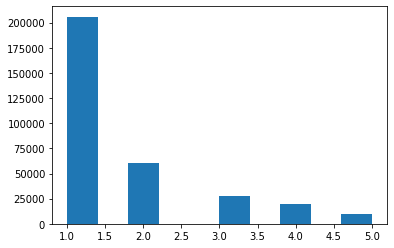

In [22]:
plt.hist([l for l in moves_count if l<6])

comment

In [ ]:
len_comment = []
for raw_data in data:
  for trio in raw_data:
    len_comment.append(len(trio[2].split(' ')))

In [ ]:
sum(len_comment)/350027

20.66387735803238

In [ ]:
ctr1 = collections.Counter(len_comment)

In [ ]:
ctr1

(array([201519.,  80022.,  32866.,  15183.,   7482.,   4484.,   2734.,
          1720.,   1099.,    778.]),
 array([  1. ,  15.8,  30.6,  45.4,  60.2,  75. ,  89.8, 104.6, 119.4,
        134.2, 149. ]),
 <a list of 10 Patch objects>)

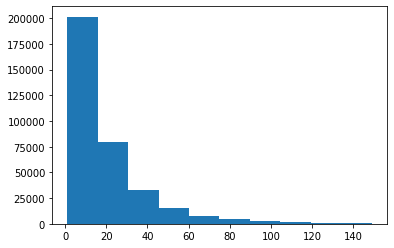

In [ ]:
plt.hist([l for l in len_comment if l<150])

words

In [ ]:
word_frequencies = collections.defaultdict(int)

In [ ]:
for raw_data in data:
  for trio in raw_data:
    words = trio[2].split(' ')
    for word in words:
      word_frequencies[word]+=1

In [ ]:
len(word_frequencies.keys())

254575

In [ ]:
freqThreshold = 3 
rareWords = []

In [ ]:
for word,freq in word_frequencies.items():
    if freq>freqThreshold:
        pass #wids[word]=len(wids)
    else:
        #unkFrequency+=freq
        rareWords.append(word)

In [ ]:
len(rareWords)

210672

In [ ]:
rareWords

['Petrov-Pucher,',
 'Touquet,',
 '2006),',
 '8.d3.',
 '[?!]\nThe',
 '9.…',
 '[?]\nOblivious',
 'h-rook,',
 'hock.',
 '[?]\nBlack',
 '11.…',
 '12.Bf1\n',
 '(12.Bd3',
 '14.Ke1',
 'Qf2#)\n',
 '(12.Be2',
 '13.Kd3',
 'queen)\n',
 '(12.Qf3',
 'bishop)\n12.…',
 'substituting',
 '12.Bxb5?',
 'salvages',
 '17.…',
 '19.Ke3',
 '(19.Ke1?',
 '20.Bf1',
 '36.Ke4',
 '37.Ke5',
 'Rg5#',
 '"League',
 'Republic"',
 'https://cga.leaguerepublic.com/l/standingsForDate/342860268/2/-1/-1.html?fbclid=IwAR0yDq0jvhIcep-JXxufQA37GvKK3AB32T_JiaOTqHmC_ewYmKki2GO-2mQ',
 'lichess',
 'https://lichess.org/iTTfOeZHRXP6',
 'Lichess',
 'https://gameknot.com/mt.pl?id=86018',
 'https://www.chess.com/game/daily/294461302',
 'Zakharov,',
 '(2376)',
 'Gusev,',
 'Aleksey',
 '(2383)',
 '12.\texd5\tNce5\n13.\td6\tBb7\n14.\tNxe5\tfxe5\n15.\tf4\texf4\n16.\tRe1\tfxe3\n17.\tRxe3+\tBe7\n18.\tQd4\tQb8\n19.\tdxe7\tQa7\n20.\tBf7+\tKxf7\n21.\te8=Q+\tRhxe8\n22.\tRf1+\tKg8\n23.\tQxa7\tRxe3\n24.\tQxe3\tBd5\n25.\tRd1\tBe6\n26.\tb3\tNe7\n27.\tR